In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df_train=pd.read_csv('train.csv')

In [6]:
df_train=df_train.drop(['Id'],axis=1)

In [10]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribution of Selling Price')

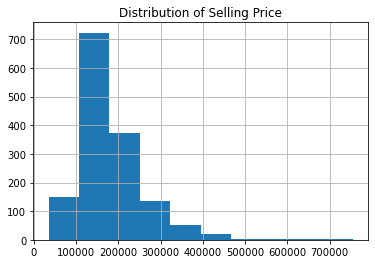

In [13]:
df_train['SalePrice'].hist()
plt.title('Distribution of Selling Price')

In [19]:
categorical=[]
for col in df_train.columns:
    if df_train[col].dtypes not in ['int64','float64']:
        categorical.append(col)
    else:
        continue

In [22]:
len(categorical)

43

In [29]:
for col in categorical:
    try:
        print(col,'------->',np.unique(df_train[col]))
    except:
        continue

MSZoning -------> ['C (all)' 'FV' 'RH' 'RL' 'RM']
Street -------> ['Grvl' 'Pave']
LotShape -------> ['IR1' 'IR2' 'IR3' 'Reg']
LandContour -------> ['Bnk' 'HLS' 'Low' 'Lvl']
Utilities -------> ['AllPub' 'NoSeWa']
LotConfig -------> ['Corner' 'CulDSac' 'FR2' 'FR3' 'Inside']
LandSlope -------> ['Gtl' 'Mod' 'Sev']
Neighborhood -------> ['Blmngtn' 'Blueste' 'BrDale' 'BrkSide' 'ClearCr' 'CollgCr' 'Crawfor'
 'Edwards' 'Gilbert' 'IDOTRR' 'MeadowV' 'Mitchel' 'NAmes' 'NPkVill'
 'NWAmes' 'NoRidge' 'NridgHt' 'OldTown' 'SWISU' 'Sawyer' 'SawyerW'
 'Somerst' 'StoneBr' 'Timber' 'Veenker']
Condition1 -------> ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNe' 'RRNn']
Condition2 -------> ['Artery' 'Feedr' 'Norm' 'PosA' 'PosN' 'RRAe' 'RRAn' 'RRNn']
BldgType -------> ['1Fam' '2fmCon' 'Duplex' 'Twnhs' 'TwnhsE']
HouseStyle -------> ['1.5Fin' '1.5Unf' '1Story' '2.5Fin' '2.5Unf' '2Story' 'SFoyer' 'SLvl']
RoofStyle -------> ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
RoofMatl -------> ['ClyTile'

<AxesSubplot:>

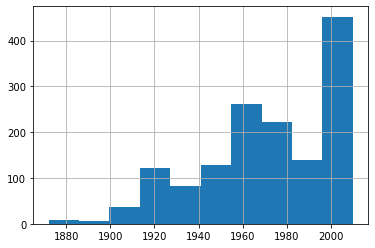

In [32]:
df_train['YearBuilt'].hist()

Text(0.5, 1.0, 'Percentage of houses sold in each year')

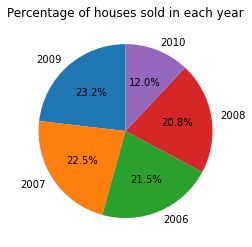

In [38]:
plt.pie(df_train['YrSold'].value_counts().values,labels=df_train['YrSold'].value_counts().index,autopct='%1.1f%%',startangle=90)
plt.title('Percentage of houses sold in each year')

In [41]:
for col in categorical:
    try:
        print('---------',col,'----------------')
        print(df_train[col].value_counts())
        print('------------------------------')
    except:
        continue

--------- MSZoning ----------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
------------------------------
--------- Street ----------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
------------------------------
--------- Alley ----------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
------------------------------
--------- LotShape ----------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
------------------------------
--------- LandContour ----------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
------------------------------
--------- Utilities ----------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
------------------------------
--------- LotConfig ----------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------

In [42]:
numerical=[]
for col in df_train.columns:
    if col not in categorical:
        numerical.append(col)
    else:
        continue

In [45]:
len(numerical)

37

In [50]:
for col in numerical:
    print('-------------',col,'--------------------')
    print('Mean',df_train[col].mean())
    print('Median',df_train[col].median())
    print('Mode',df_train[col].mode()[0])

------------- MSSubClass --------------------
Mean 56.897260273972606
Median 50.0
Mode 20
------------- LotFrontage --------------------
Mean 70.04995836802665
Median 69.0
Mode 60.0
------------- LotArea --------------------
Mean 10516.828082191782
Median 9478.5
Mode 7200
------------- OverallQual --------------------
Mean 6.0993150684931505
Median 6.0
Mode 5
------------- OverallCond --------------------
Mean 5.575342465753424
Median 5.0
Mode 5
------------- YearBuilt --------------------
Mean 1971.267808219178
Median 1973.0
Mode 2006
------------- YearRemodAdd --------------------
Mean 1984.8657534246574
Median 1994.0
Mode 1950
------------- MasVnrArea --------------------
Mean 103.68526170798899
Median 0.0
Mode 0.0
------------- BsmtFinSF1 --------------------
Mean 443.6397260273973
Median 383.5
Mode 0
------------- BsmtFinSF2 --------------------
Mean 46.54931506849315
Median 0.0
Mode 0
------------- BsmtUnfSF --------------------
Mean 567.2404109589041
Median 477.5
Mode 0
--------